# Analise de suicidios no Brasil - Setembro Amarelo.

In [2]:
# Importando bibliótecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando os dados:

dados = pd.read_csv('suicide_rates.csv')

In [4]:
# Verificando atributos dos dados:

print('Formato dos dados:', dados.shape)
dados.head()

Formato dos dados: (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# Coletando dados apenas do Brasil:

dados_brasil = dados[dados.country == 'Brazil'].copy()


In [6]:
# Verificando o formato da coleta dos novos dados:

print('Formato dos dados: ', dados_brasil.shape)

Formato dos dados:  (372, 12)


In [7]:
# Exibindo as estrandas:

dados_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [11]:
# Verificando valores ausentes nos dados mundiais:

print('--> Mundial: ')
display(dados.isnull().sum())

print('\n', '-*-' * 10, '\n')

# Verificando valores ausentes nos dados do Brasil:

print('--> Brasil: ')
display(dados_brasil.isnull().sum())


--> Mundial: 


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 -*--*--*--*--*--*--*--*--*--*- 

--> Brasil: 


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

# Tendências ao suícidio!

In [14]:
# Coletar a média mundial e do Brasil em suícidios:

year = dados_brasil.year.unique()
suicides_brasil_mean = dados_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = dados.groupby('year')['suicides/100k pop'].mean()


In [15]:
# Removendo o anos de 2016 por não conter dados:

suicides_world_mean.drop(2016, inplace = True)

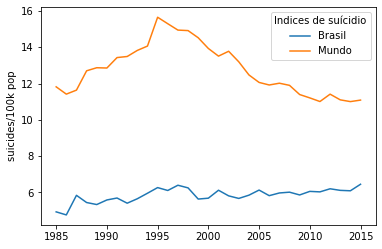

In [18]:
# Plotando o comparativo entre o Brasil e o Mundo:

ax = sns.lineplot(x = year, y = suicides_brasil_mean, label = 'Brasil')
ax = sns.lineplot(x = year, y = suicides_world_mean, label = 'Mundo')
plt.legend(title = 'Indices de suícidio')
plt.show()

# Faixa etária com maior índice de suícidios!

In [19]:
# Criando uma tabela dinâmica:

tabela = pd.pivot_table(dados_brasil, values = 'suicides_no', index = ['year'], columns = ['age'])

In [21]:
# Reordenando as tabelas em ordem crescente:

column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
tabela = table.reindex(column_order, axis = 1)

In [22]:
# Verificando as primeiras entradas da tabela:

tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


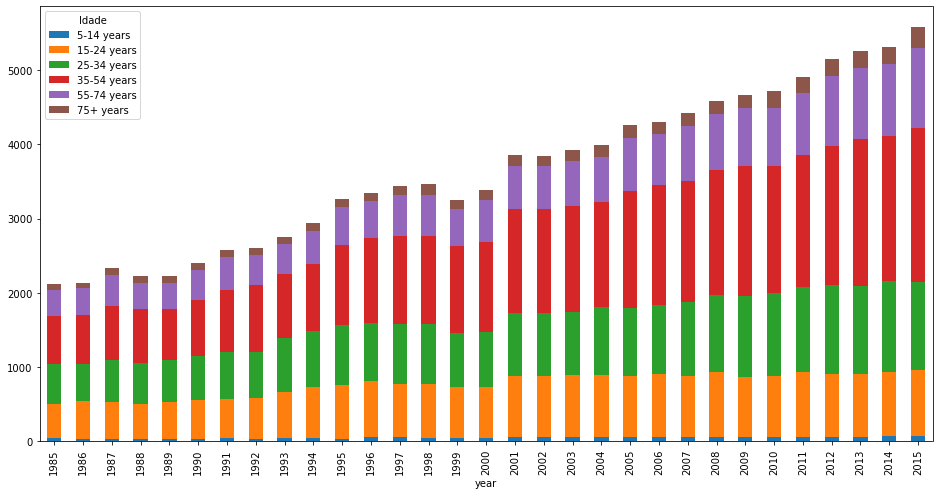

In [28]:
# Plotando a tabela das faixas etárias:

tabela.plot.bar(stacked = True, figsize = (16,8))
plt.legend(title = 'Idade');

In [29]:
# Estatística de suícidios por faixa etária:

tabela[['25-34 years']].loc[2015]
tabela.loc[2015] / tabela.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

# Analisando o índice de suícidios entre homens e mulheres!

In [35]:
# Extraindo valores entre homens e mulheres:

hom_mul = dados_brasil.groupby('sex').suicides_no.sum() / dados_brasil.groupby('sex').suicides_no.sum().sum()

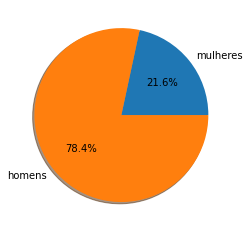

In [36]:
# Plotando gráfico para visualização:

plt.pie(hom_mul, labels = ['mulheres', 'homens'], autopct = '%1.1f%%', shadow = True);

# Correlação entre PIB, IDH e suícidios:

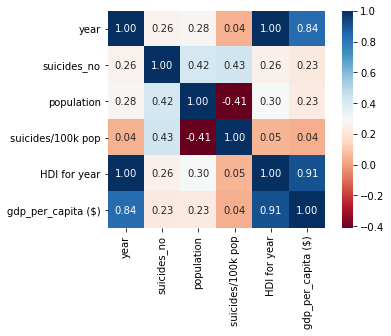

In [37]:
# Plotando gráfico heatmap para visualização:

corr = dados_brasil.corr()
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

In [ ]:
# Observações:

# Faltam dados nos índices de IDH, portando pode-se ter uma interpletação incorreta sobre os dados!